In [3]:
import polars as pl
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error


In [4]:

# Read the parquet file using Polars
df = pl.read_parquet('./data/yellow_tripdata_2023-01.parquet')

# Display the DataFrame
df


19


In [ ]:

# Question 1: Get the number of columns
num_columns = len(df.columns)
print(num_columns)  # Output: 19


In [5]:

# Question 2: Calculate trip duration
df = df.with_columns([
    (pl.col('tpep_dropoff_datetime') - pl.col('tpep_pickup_datetime')).alias('duration')
])
df = df.with_columns([
    (pl.col('duration').dt.seconds() / 60).alias('duration')
])


/tmp/ipykernel_28124/1318757986.py:6: DeprecationWarning: `seconds` is deprecated. It has been renamed to `total_seconds`.
  (pl.col('duration').dt.seconds() / 60).alias('duration')


In [6]:

# Describe the duration column
duration_describe = df['duration'].describe()
print(duration_describe)


shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ value        │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 3.066766e6   │
│ null_count ┆ 0.0          │
│ mean       ┆ 15.668995    │
│ std        ┆ 42.594351    │
│ min        ┆ -29.2        │
│ 25%        ┆ 7.116667     │
│ 50%        ┆ 11.516667    │
│ 75%        ┆ 18.3         │
│ max        ┆ 10029.183333 │
└────────────┴──────────────┘


In [7]:

# Question 3: Filter trips with duration between 1 and 60 minutes
df2 = df.filter((pl.col('duration') >= 1) & (pl.col('duration') <= 60))
proportion = len(df2) / len(df)
print(proportion)  # Output: 0.9812202822125979


0.9812202822125979


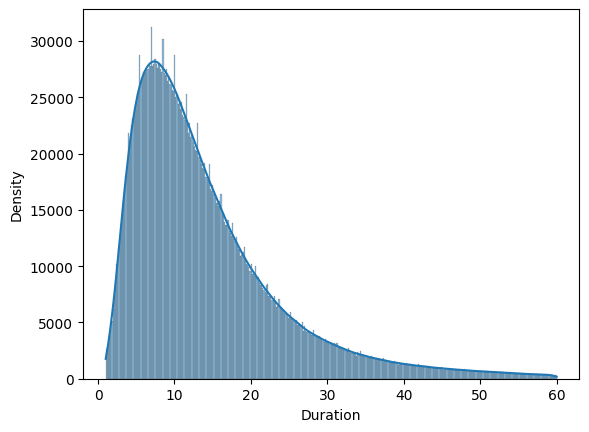

In [8]:

# Plot the distribution of the filtered durations
sns.histplot(df2['duration'].to_pandas(), kde=True)
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()
